In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics

%matplotlib inline

In [29]:
d1 = pd.read_csv('train2.csv',na_values=['+ACI-  +ACIAIg-status+ACIAIg- : 500+ACI-','0+AHs-'])
d1.shape

(1048575, 17)

In [30]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
ID                        1048575 non-null int64
vendor+AF8-id             1048574 non-null float64
pickup+AF8-loc            1048574 non-null float64
drop+AF8-loc              1048574 non-null float64
driver+AF8-tip            1048573 non-null object
mta+AF8-tax               1048573 non-null object
distance                  1048574 non-null float64
pickup+AF8-time           1048574 non-null object
drop+AF8-time             1048574 non-null object
num+AF8-passengers        1048574 non-null float64
toll+AF8-amount           1048573 non-null object
payment+AF8-method        1048574 non-null float64
rate+AF8-code             1048574 non-null float64
stored+AF8-flag           1048574 non-null object
extra+AF8-charges         1048574 non-null object
improvement+AF8-charge    1048573 non-null object
total+AF8-amount          1048573 non-null object
dtypes: float64(7), int64(1), o

In [31]:
d1.head()

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount
0,0,1.0,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,2.0,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36
2,2,2.0,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,N,0,0.3,8.8
3,3,2.0,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,N,0,0.3,14.8
4,4,2.0,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,N,0,0.3,4.8


In [32]:
d1.isnull().sum()

ID                        0
vendor+AF8-id             1
pickup+AF8-loc            1
drop+AF8-loc              1
driver+AF8-tip            2
mta+AF8-tax               2
distance                  1
pickup+AF8-time           1
drop+AF8-time             1
num+AF8-passengers        1
toll+AF8-amount           2
payment+AF8-method        1
rate+AF8-code             1
stored+AF8-flag           1
extra+AF8-charges         1
improvement+AF8-charge    2
total+AF8-amount          2
dtype: int64

In [33]:
d1_u1=d1.replace(to_replace='\+AC0\-', value='', regex=True)

In [34]:
d1_u1.head()

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount
0,0,1.0,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,2.0,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36
2,2,2.0,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,N,0,0.3,8.8
3,3,2.0,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,N,0,0.3,14.8
4,4,2.0,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,N,0,0.3,4.8


In [35]:
d1.describe()

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,distance,num+AF8-passengers,payment+AF8-method,rate+AF8-code
count,1.048575e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06
mean,5.242870e+05,1.541465e+00,1.648085e+02,1.626675e+02,2.859832e+00,1.590696e+00,1.317943e+00,1.043368e+00
std,3.026977e+05,4.982779e-01,6.579282e+01,6.953073e+01,3.709541e+00,1.253700e+00,4.853266e-01,5.621114e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.621435e+05,1.000000e+00,1.250000e+02,1.130000e+02,9.300000e-01,1.000000e+00,1.000000e+00,1.000000e+00
50%,5.242870e+05,2.000000e+00,1.620000e+02,1.620000e+02,1.600000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,7.864305e+05,2.000000e+00,2.330000e+02,2.330000e+02,2.900000e+00,2.000000e+00,2.000000e+00,1.000000e+00
max,1.048574e+06,2.000000e+00,2.650000e+02,2.650000e+02,1.138000e+02,9.000000e+00,4.000000e+00,9.900000e+01


In [36]:
d1.columns

Index(['ID', 'vendor+AF8-id', 'pickup+AF8-loc', 'drop+AF8-loc',
       'driver+AF8-tip', 'mta+AF8-tax', 'distance', 'pickup+AF8-time',
       'drop+AF8-time', 'num+AF8-passengers', 'toll+AF8-amount',
       'payment+AF8-method', 'rate+AF8-code', 'stored+AF8-flag',
       'extra+AF8-charges', 'improvement+AF8-charge', 'total+AF8-amount'],
      dtype='object')

In [37]:
d1_u1.isnull().sum()

ID                        0
vendor+AF8-id             1
pickup+AF8-loc            1
drop+AF8-loc              1
driver+AF8-tip            2
mta+AF8-tax               2
distance                  1
pickup+AF8-time           1
drop+AF8-time             1
num+AF8-passengers        1
toll+AF8-amount           2
payment+AF8-method        1
rate+AF8-code             1
stored+AF8-flag           1
extra+AF8-charges         1
improvement+AF8-charge    2
total+AF8-amount          2
dtype: int64

In [38]:
d1_u1['stored+AF8-flag']=d1_u1['stored+AF8-flag'].replace(to_replace='N', value=0, regex=True)
d1_u1['stored+AF8-flag']=d1_u1['stored+AF8-flag'].replace(to_replace='Y', value=1, regex=True)    

In [39]:
d1_u1.head()

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount
0,0,1.0,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,0.0,1,0.3,9.13
1,1,2.0,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,0.0,1,0.3,21.36
2,2,2.0,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,0.0,0,0.3,8.8
3,3,2.0,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,0.0,0,0.3,14.8
4,4,2.0,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,0.0,0,0.3,4.8


In [40]:
mean_value=d1_u1['driver+AF8-tip'].median()
d1_u1['driver+AF8-tip']=d1_u1['driver+AF8-tip'].fillna(mean_value)
median_value=d1_u1['vendor+AF8-id'].median()
d1_u1['vendor+AF8-id']=d1_u1['vendor+AF8-id'].fillna(median_value)
median_value=d1_u1['pickup+AF8-loc'].median()
d1_u1['pickup+AF8-loc']=d1_u1['pickup+AF8-loc'].fillna(median_value)
median_value=d1_u1['drop+AF8-loc'].median()
d1_u1['drop+AF8-loc']=d1_u1['drop+AF8-loc'].fillna(median_value)
median_value=d1_u1['mta+AF8-tax'].median()
d1_u1['mta+AF8-tax']=d1_u1['mta+AF8-tax'].fillna(median_value)
median_value=d1_u1['distance'].median()
d1_u1['distance']=d1_u1['distance'].fillna(median_value)
median_value=d1_u1['num+AF8-passengers'].median()
d1_u1['num+AF8-passengers']=d1_u1['num+AF8-passengers'].fillna(median_value)
median_value=d1_u1['toll+AF8-amount'].median()
d1_u1['toll+AF8-amount']=d1_u1['toll+AF8-amount'].fillna(median_value)
median_value=d1_u1['extra+AF8-charges'].median()
d1_u1['extra+AF8-charges']=d1_u1['extra+AF8-charges'].fillna(median_value)
median_value=d1_u1['improvement+AF8-charge'].median()
d1_u1['improvement+AF8-charge']=d1_u1['improvement+AF8-charge'].fillna(median_value)
median_value=d1_u1['total+AF8-amount'].median()
d1_u1['total+AF8-amount']=d1_u1['total+AF8-amount'].fillna(median_value)
median_value=d1_u1['rate+AF8-code'].median()
d1_u1['rate+AF8-code']=d1_u1['rate+AF8-code'].fillna(median_value)
mean_value=d1_u1['stored+AF8-flag'].median()
d1_u1['stored+AF8-flag']=d1_u1['stored+AF8-flag'].fillna(mean_value)


In [41]:
d1_u1.isnull().sum()

ID                        0
vendor+AF8-id             0
pickup+AF8-loc            0
drop+AF8-loc              0
driver+AF8-tip            0
mta+AF8-tax               0
distance                  0
pickup+AF8-time           1
drop+AF8-time             1
num+AF8-passengers        0
toll+AF8-amount           0
payment+AF8-method        1
rate+AF8-code             0
stored+AF8-flag           0
extra+AF8-charges         0
improvement+AF8-charge    0
total+AF8-amount          0
dtype: int64

In [42]:
d1_u1['pickup+AF8-time'] = pd.to_datetime(d1_u1['pickup+AF8-time'])
d1_u1['drop+AF8-time'] = pd.to_datetime(d1_u1['drop+AF8-time'])
d1_u1['pickup+AF8-time'] = d1_u1['drop+AF8-time']-d1_u1['pickup+AF8-time'] 

In [43]:
d1_u1.head()

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount
0,0,1.0,170.0,233.0,1.83,0.5,0.70,00:05:21,2017-04-04 18:05:04,1.0,0,1.0,1.0,0.0,1,0.3,9.13
1,1,2.0,151.0,243.0,3.56,0.5,4.64,00:16:30,2017-04-03 19:20:04,1.0,0,1.0,1.0,0.0,1,0.3,21.36
2,2,2.0,68.0,90.0,1.5,0.5,1.29,00:06:17,2017-04-03 15:12:30,2.0,0,1.0,1.0,0.0,0,0.3,8.8
3,3,2.0,142.0,234.0,1.5,0.5,2.74,00:16:08,2017-04-04 08:27:00,1.0,0,1.0,1.0,0.0,0,0.3,14.8
4,4,2.0,238.0,238.0,0,0.5,0.45,00:02:42,2017-04-05 14:05:41,6.0,0,2.0,1.0,0.0,0,0.3,4.8


In [44]:
d1_u1['pickup+AF8-time'] = pd.to_datetime(d1_u1['pickup+AF8-time'])
d1_u1['journey_duration'] = d1_u1['pickup+AF8-time'].dt.hour*60 + d1_u1['pickup+AF8-time'].dt.minute + (d1_u1['pickup+AF8-time'].dt.second)/60 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [45]:
mean_value=d1_u1['journey_duration'].median()
d1_u1['journey_duration']=d1_u1['journey_duration'].fillna(mean_value)

In [46]:
d1_u1.columns

Index(['ID', 'vendor+AF8-id', 'pickup+AF8-loc', 'drop+AF8-loc',
       'driver+AF8-tip', 'mta+AF8-tax', 'distance', 'pickup+AF8-time',
       'drop+AF8-time', 'num+AF8-passengers', 'toll+AF8-amount',
       'payment+AF8-method', 'rate+AF8-code', 'stored+AF8-flag',
       'extra+AF8-charges', 'improvement+AF8-charge', 'total+AF8-amount',
       'journey_duration'],
      dtype='object')

In [47]:
d1_u1.head()

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount,journey_duration
0,0,1.0,170.0,233.0,1.83,0.5,0.70,1970-01-01 00:05:21,2017-04-04 18:05:04,1.0,0,1.0,1.0,0.0,1,0.3,9.13,5.350000
1,1,2.0,151.0,243.0,3.56,0.5,4.64,1970-01-01 00:16:30,2017-04-03 19:20:04,1.0,0,1.0,1.0,0.0,1,0.3,21.36,16.500000
2,2,2.0,68.0,90.0,1.5,0.5,1.29,1970-01-01 00:06:17,2017-04-03 15:12:30,2.0,0,1.0,1.0,0.0,0,0.3,8.8,6.283333
3,3,2.0,142.0,234.0,1.5,0.5,2.74,1970-01-01 00:16:08,2017-04-04 08:27:00,1.0,0,1.0,1.0,0.0,0,0.3,14.8,16.133333
4,4,2.0,238.0,238.0,0,0.5,0.45,1970-01-01 00:02:42,2017-04-05 14:05:41,6.0,0,2.0,1.0,0.0,0,0.3,4.8,2.700000


In [49]:
d1_u1.columns = ['ID', 'vendor_id', 'pickup_loc', 'drop_loc',
       'driver_tip', 'mta_tax', 'distance', 'pickup_time',
       'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag',
       'extra_charges', 'improvement_charge', 'total_amount', 'journey_duration']

In [50]:
d1_u1.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount,journey_duration
0,0,1.0,170.0,233.0,1.83,0.5,0.70,1970-01-01 00:05:21,2017-04-04 18:05:04,1.0,0,1.0,1.0,0.0,1,0.3,9.13,5.350000
1,1,2.0,151.0,243.0,3.56,0.5,4.64,1970-01-01 00:16:30,2017-04-03 19:20:04,1.0,0,1.0,1.0,0.0,1,0.3,21.36,16.500000
2,2,2.0,68.0,90.0,1.5,0.5,1.29,1970-01-01 00:06:17,2017-04-03 15:12:30,2.0,0,1.0,1.0,0.0,0,0.3,8.8,6.283333
3,3,2.0,142.0,234.0,1.5,0.5,2.74,1970-01-01 00:16:08,2017-04-04 08:27:00,1.0,0,1.0,1.0,0.0,0,0.3,14.8,16.133333
4,4,2.0,238.0,238.0,0,0.5,0.45,1970-01-01 00:02:42,2017-04-05 14:05:41,6.0,0,2.0,1.0,0.0,0,0.3,4.8,2.700000


### Loading the test Data

In [51]:
d2 = pd.read_csv('test2.csv')
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 16 columns):
ID                    154235 non-null int64
vendor_id             154235 non-null int64
pickup_loc            154235 non-null float64
drop_loc              154235 non-null float64
driver_tip            154235 non-null float64
mta_tax               154235 non-null float64
distance              154235 non-null float64
pickup_time           154235 non-null object
drop_time             154235 non-null object
num_passengers        154235 non-null float64
toll_amount           154235 non-null float64
payment_method        154235 non-null float64
rate_code             154235 non-null float64
stored_flag           154235 non-null object
extra_charges         154235 non-null float64
improvement_charge    154235 non-null float64
dtypes: float64(11), int64(2), object(3)
memory usage: 18.8+ MB


In [52]:
d2.isnull().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
dtype: int64

In [53]:
d2['pickup_time'] = pd.to_datetime(d2['pickup_time'])
d2['drop_time'] = pd.to_datetime(d2['drop_time'])
d2['pickup_time'] = d2['drop_time']-d2['pickup_time'] 
d2['pickup_time'] = pd.to_datetime(d2['pickup_time'])
d2['journey_duration'] = d2['pickup_time'].dt.hour*60 + d2['pickup_time'].dt.minute + (d2['pickup_time'].dt.second)/60 

In [54]:
d2['stored_flag']=d2['stored_flag'].replace(to_replace='N', value=0, regex=True)
d2['stored_flag']=d2['stored_flag'].replace(to_replace='Y', value=1, regex=True)    

In [55]:
d2.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,journey_duration
0,0,1,68.0,186.0,1.00,0.5,0.70,1970-01-01 00:04:17,2017-04-05 05:54:03,1.0,0.0,1.0,1.0,0,0.5,0.3,4.283333
1,1,1,170.0,161.0,2.55,0.5,1.00,1970-01-01 00:18:33,2017-04-07 09:16:00,1.0,0.0,1.0,1.0,0,0.0,0.3,18.550000
2,2,2,13.0,246.0,2.96,0.5,3.35,1970-01-01 00:14:52,2017-04-06 08:21:33,2.0,0.0,1.0,1.0,0,0.0,0.3,14.866667
3,3,1,170.0,233.0,2.00,0.5,0.80,1970-01-01 00:05:47,2017-04-04 08:37:21,2.0,0.0,1.0,1.0,0,0.0,0.3,5.783333
4,4,1,237.0,236.0,1.00,0.5,0.70,1970-01-01 00:06:53,2017-04-07 11:00:59,1.0,0.0,1.0,1.0,1,0.0,0.3,6.883333


In [56]:
### NOW USING THE MODEL

In [57]:
X_train = d1_u1[['vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'num_passengers', 'toll_amount', 'rate_code', 'extra_charges',
       'improvement_charge', 'journey_duration','stored_flag']]
X_train.shape

(1048575, 13)

In [59]:
Y_train = d1_u1['total_amount']
Y_train.shape

(1048575,)

In [60]:
d2.columns

Index(['ID', 'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'pickup_time', 'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge', 'journey_duration'],
      dtype='object')

In [61]:
X_test = d2[['vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'num_passengers', 'toll_amount', 'rate_code', 'extra_charges',
       'improvement_charge', 'journey_duration','stored_flag']]
X_test.shape

(154235, 13)

In [62]:
X_train.isnull().sum()

vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
num_passengers        0
toll_amount           0
rate_code             0
extra_charges         0
improvement_charge    0
journey_duration      0
stored_flag           0
dtype: int64

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
vendor_id             1048575 non-null float64
pickup_loc            1048575 non-null float64
drop_loc              1048575 non-null float64
driver_tip            1048575 non-null object
mta_tax               1048575 non-null object
distance              1048575 non-null float64
num_passengers        1048575 non-null float64
toll_amount           1048575 non-null object
rate_code             1048575 non-null float64
extra_charges         1048575 non-null object
improvement_charge    1048575 non-null object
journey_duration      1048575 non-null float64
stored_flag           1048575 non-null float64
dtypes: float64(8), object(5)
memory usage: 104.0+ MB


In [64]:
X_train['driver_tip'] = X_train['driver_tip'].astype('float')
X_train['mta_tax'] = X_train['mta_tax'].astype('float')
X_train['toll_amount'] = X_train['toll_amount'].astype('float')
X_train['extra_charges'] = X_train['extra_charges'].astype('float')
X_train['improvement_charge'] = X_train['improvement_charge'].astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [65]:
X_train['loc_diff']=X_train['drop_loc']-X_train['pickup_loc']
X_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,num_passengers,toll_amount,rate_code,extra_charges,improvement_charge,journey_duration,stored_flag,loc_diff
0,1.0,170.0,233.0,1.83,0.5,0.70,1.0,0.0,1.0,1.0,0.3,5.350000,0.0,63.0
1,2.0,151.0,243.0,3.56,0.5,4.64,1.0,0.0,1.0,1.0,0.3,16.500000,0.0,92.0
2,2.0,68.0,90.0,1.50,0.5,1.29,2.0,0.0,1.0,0.0,0.3,6.283333,0.0,22.0
3,2.0,142.0,234.0,1.50,0.5,2.74,1.0,0.0,1.0,0.0,0.3,16.133333,0.0,92.0
4,2.0,238.0,238.0,0.00,0.5,0.45,6.0,0.0,1.0,0.0,0.3,2.700000,0.0,0.0


In [66]:
Y_train = Y_train.astype('float')

Text(0, 0.5, 'total_fare')

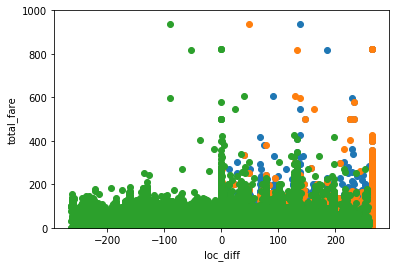

In [67]:
mpl.rcParams['agg.path.chunksize'] = 10000
plt.scatter(X_train['pickup_loc'], Y_train)
plt.xlabel('pickup_loc')
plt.ylabel('total_fare')
#mpl.rcParams['agg.path.chunksize'] = 10000
plt.scatter(X_train['drop_loc'], Y_train)
plt.xlabel('drop_loc')
plt.ylabel('total_fare')
#mpl.rcParams['agg.path.chunksize'] = 10000
plt.scatter(X_train['loc_diff'], Y_train)
plt.ylim(0,1000)
plt.xlabel('loc_diff')
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

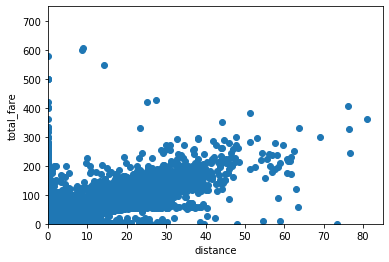

In [68]:
plt.scatter(X_train['distance'], Y_train)
plt.xlabel('distance')
plt.xlim(0,85)
plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

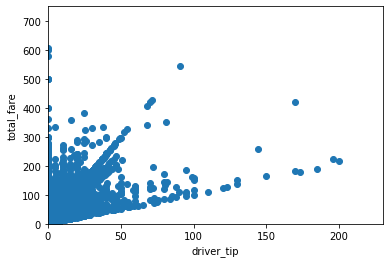

In [69]:
plt.scatter(X_train['driver_tip'], Y_train)
plt.xlabel('driver_tip')
plt.xlim(0,230)
plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

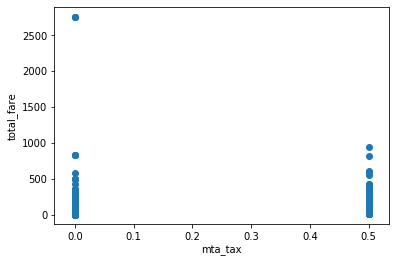

In [70]:
plt.scatter(X_train['mta_tax'], Y_train)
plt.xlabel('mta_tax')
# plt.xlim(0,230)
# plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

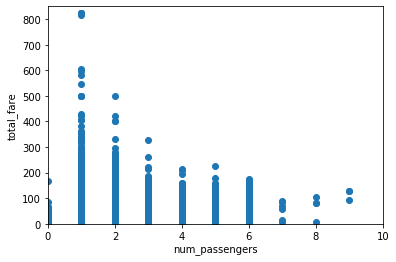

In [71]:
plt.scatter(X_train['num_passengers'], Y_train)
plt.xlabel('num_passengers')
plt.xlim(0,10)
plt.ylim(0,850)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

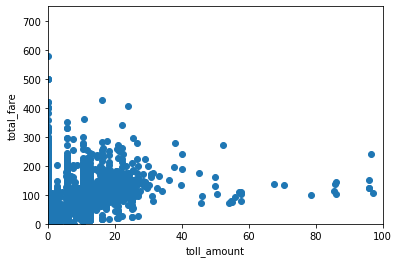

In [72]:
plt.scatter(X_train['toll_amount'], Y_train)
plt.xlabel('toll_amount')
plt.xlim(0,100)
plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

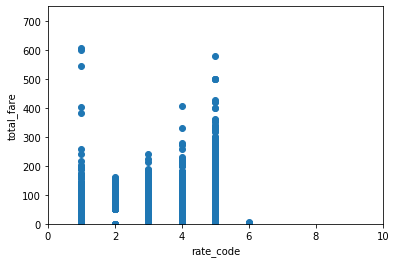

In [73]:
plt.scatter(X_train['rate_code'], Y_train)
plt.xlabel('rate_code')
plt.xlim(0,10)
plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

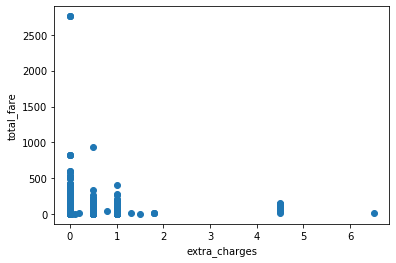

In [74]:
plt.scatter(X_train['extra_charges'], Y_train)
plt.xlabel('extra_charges')
# plt.xlim(0,100)
# plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

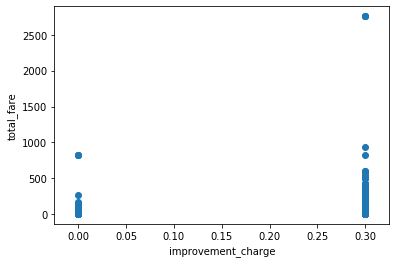

In [75]:
plt.scatter(X_train['improvement_charge'], Y_train)
plt.xlabel('improvement_charge')
# plt.xlim(0,100)
# plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

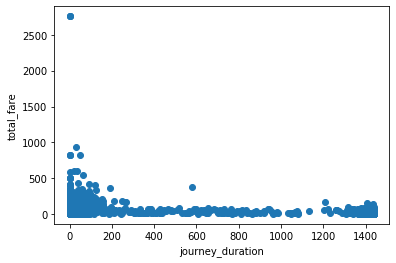

In [76]:
plt.scatter(X_train['journey_duration'], Y_train)
plt.xlabel('journey_duration')
# plt.xlim(0,100)
# plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

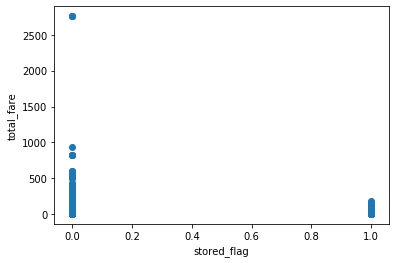

In [77]:
plt.scatter(X_train['stored_flag'], Y_train)
plt.xlabel('stored_flag')
# plt.xlim(0,100)
# plt.ylim(0,750)
plt.ylabel('total_fare')

In [79]:
X_train['dist_sq'] = X_train['distance'] * X_train['distance']
X_train['tip_sq'] = X_train['driver_tip'] * X_train['driver_tip']
X_train['toll_sq'] = X_train['toll_amount'] * X_train['toll_amount']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [80]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 13 columns):
vendor_id             154235 non-null int64
pickup_loc            154235 non-null float64
drop_loc              154235 non-null float64
driver_tip            154235 non-null float64
mta_tax               154235 non-null float64
distance              154235 non-null float64
num_passengers        154235 non-null float64
toll_amount           154235 non-null float64
rate_code             154235 non-null float64
extra_charges         154235 non-null float64
improvement_charge    154235 non-null float64
journey_duration      154235 non-null float64
stored_flag           154235 non-null int64
dtypes: float64(11), int64(2)
memory usage: 15.3 MB


In [81]:
X_test['loc_diff'] = X_test['drop_loc'] - X_test['pickup_loc']
X_test['dist_sq'] = X_test['distance'] * X_test['distance']
X_test['tip_sq'] = X_test['driver_tip'] * X_test['driver_tip']
X_test['toll_sq'] = X_test['toll_amount'] * X_test['toll_amount']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [82]:
X_train.head()

,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,num_passengers,toll_amount,rate_code,extra_charges,improvement_charge,journey_duration,stored_flag,loc_diff,dist_sq,tip_sq,toll_sq
0,1.0,170.0,233.0,1.83,0.5,0.70,1.0,0.0,1.0,1.0,0.3,5.350000,0.0,63.0,0.4900,3.3489,0.0
1,2.0,151.0,243.0,3.56,0.5,4.64,1.0,0.0,1.0,1.0,0.3,16.500000,0.0,92.0,21.5296,12.6736,0.0
2,2.0,68.0,90.0,1.50,0.5,1.29,2.0,0.0,1.0,0.0,0.3,6.283333,0.0,22.0,1.6641,2.2500,0.0
3,2.0,142.0,234.0,1.50,0.5,2.74,1.0,0.0,1.0,0.0,0.3,16.133333,0.0,92.0,7.5076,2.2500,0.0
4,2.0,238.0,238.0,0.00,0.5,0.45,6.0,0.0,1.0,0.0,0.3,2.700000,0.0,0.0,0.2025,0.0000,0.0


In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
vendor_id             1048575 non-null float64
pickup_loc            1048575 non-null float64
drop_loc              1048575 non-null float64
driver_tip            1048575 non-null float64
mta_tax               1048575 non-null float64
distance              1048575 non-null float64
num_passengers        1048575 non-null float64
toll_amount           1048575 non-null float64
rate_code             1048575 non-null float64
extra_charges         1048575 non-null float64
improvement_charge    1048575 non-null float64
journey_duration      1048575 non-null float64
stored_flag           1048575 non-null float64
loc_diff              1048575 non-null float64
dist_sq               1048575 non-null float64
tip_sq                1048575 non-null float64
toll_sq               1048575 non-null float64
dtypes: float64(17)
memory usage: 136.0 MB


In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [85]:
model1 = linear_model.LinearRegression()

model1.fit(X_train, Y_train)

prediction1 = model1.predict(X_test)
prediction2 = model1.predict(X_train)

Y_test = prediction1

#plt.scatter(Y_test, prediction1)

model1.coef_

dframe_coef = pd.DataFrame(model1.coef_, X_train.columns, columns=['Coeifficent Values'])

dframe_coef

,Coeifficent Values
vendor_id,-0.027521
pickup_loc,0.000800
drop_loc,0.001000
driver_tip,1.436325
mta_tax,-43.302996
distance,2.764576
num_passengers,0.006758
toll_amount,0.940391
rate_code,1.348842
extra_charges,0.555807


In [86]:
model2 = RandomForestRegressor()

model2.fit(X_train, Y_train)

prediction3 = model2.predict(X_test)
prediction4 = model2.predict(X_train)

Y_test = prediction3

#plt.scatter(Y_test, prediction1)

# model1.coef_

# dframe_coef = pd.DataFrame(model1.coef_, X_train.columns, columns=['Coeifficent Values'])

# dframe_coef

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [111]:
from sklearn.model_selection import cross_validate

#loo = cross_validate.LeaveOneOut(len(Y_train))

scores = cross_validate(model2, X_train, Y_train, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                         return_train_score=True)

In [117]:
scores

{'fit_time': array([111.86932707, 111.12688875, 112.64294147]),
 'score_time': array([6.11098337, 6.04985738, 6.21170688]),
 'test_r2': array([0.91736381, 0.88576509, 0.91545507]),
 'train_r2': array([0.98581115, 0.97328264, 0.971128  ]),
 'test_neg_mean_squared_error': array([-18.49098353, -26.41458557, -19.2554383 ]),
 'train_neg_mean_squared_error': array([-3.25623603, -6.03170501, -6.56837279])}

In [88]:
import xgboost as xgb

In [89]:
model3 = xgb.XGBRegressor()

model3.fit(X_train, Y_train)

prediction5 = model3.predict(X_test)
prediction6 = model3.predict(X_train)

Y_test = prediction5

#plt.scatter(Y_test, prediction1)

# model1.coef_

# dframe_coef = pd.DataFrame(model1.coef_, X_train.columns, columns=['Coeifficent Values'])

# dframe_coef

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:46:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [90]:
RMSR1=np.sqrt(metrics.mean_squared_error(Y_train, prediction2))
RMSR1

6.484487494114009

In [113]:
RMSR1=np.sqrt(metrics.mean_squared_error(Y_train, prediction4))
print(RMSR1)
prediction3

2.1365483135586785


array([ 7.3  , 15.35 , 17.76 , ...,  9.36 , 14.751, 15.96 ])

In [115]:
prediction3.round(2)[:100]

array([ 7.3 , 15.35, 17.76,  8.65,  7.8 ,  9.12, 11.3 , 15.36,  8.65,
       12.35, 21.06, 14.81, 23.55, 22.75, 10.35,  5.8 , 41.47, 11.8 ,
        6.6 ,  5.8 , 18.75, 13.56,  7.3 , 46.87, 23.66,  8.5 , 15.78,
       16.6 , 56.78,  4.6 , 29.96,  7.74, 20.8 , 18.5 , 11.4 , 16.1 ,
        8.3 , 18.15,  4.27,  7.55,  9.49,  9.02, 11.76, 49.86, 18.6 ,
        6.65, 11.75,  6.6 ,  6.65, 35.03,  8.65, 85.25,  6.85,  7.45,
        9.1 ,  6.95, 11.16,  6.95,  9.35, 14.12,  5.55, 25.92, 45.36,
        4.2 , 12.89,  8.8 , 14.16, 20.4 , 11.8 , 17.71,  8.3 , 33.6 ,
        8.75, 13.56,  7.5 , 11.1 , 11.3 , 11.25,  8.15, 29.16, 16.1 ,
       11.8 ,  7.56,  9.3 ,  5.75, 16.53, 19.6 , 10.03, 12.36, 19.9 ,
       16.54, 21.95, 22.36,  8.5 ,  8.76,  7.8 , 20.54,  8.65, 20.23,
       10.56])

In [96]:
RMSR1=np.sqrt(metrics.mean_squared_error(Y_train, prediction6))
print(RMSR1)
prediction5

5.39571489954327


array([ 7.318637 , 14.8995075, 17.540714 , ...,  9.263428 , 14.461661 ,
       16.171844 ], dtype=float32)

In [98]:
from pandas import DataFrame
C = { 'ID': d2['ID'],
      'total_amount': prediction3,
    }
df = DataFrame(C, columns= ['ID', 'total_amount'])
export_csv = df.to_csv ('SampleSubmission2.csv', index = None, header=True) # here you have to write path, where result file will be stored
print (df)

            ID  total_amount
0            0         7.300
1            1        15.350
2            2        17.760
3            3         8.650
4            4         7.800
5            5         9.120
6            6        11.300
7            7        15.360
8            8         8.650
9            9        12.350
10          10        21.061
11          11        14.813
12          12        23.550
13          13        22.750
14          14        10.350
15          15         5.800
16          16        41.470
17          17        11.804
18          18         6.600
19          19         5.800
20          20        18.750
21          21        13.560
22          22         7.300
23          23        46.870
24          24        23.658
25          25         8.500
26          26        15.782
27          27        16.600
28          28        56.780
29          29         4.600
...        ...           ...
154205  154205        43.132
154206  154206         4.750
154207  154207